AUC             alpha
0.841113841114 999.9999999999999
0.864045864046 99.99999999999999
0.907452907453 10.0
0.9180999181 1.0
0.882882882883 0.1
0.861588861589 0.010000000000000002
0.851760851761 0.0010000000000000002
0.850941850942 0.00010000000000000002
0.849303849304 1.0000000000000003e-05


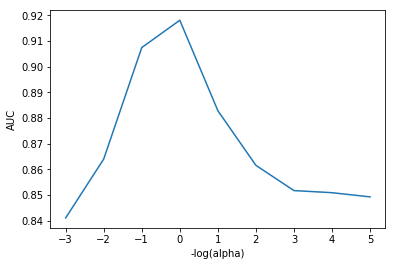

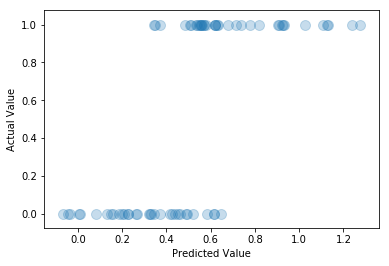

In [2]:
from urllib.request import urlopen
import numpy
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as plt

#read data from uci data repository
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    line = line.decode()
    #split on comma
    row = line.strip().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
    #remove lable from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)
    
#divide attribute matrix and label vector into training(2/3 of data)
#and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class for
#scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain)
xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

alphaList = [0.1**i for i in [-3, -2, -1, 0,1, 2, 3, 4, 5]]

aucList = []
for alph in alphaList:
    rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
    rocksVMinesRidgeModel.fit(xTrain, yTrain)
    fpr, tpr, thresholds = roc_curve(yTest, rocksVMinesRidgeModel.predict(xTest))
    roc_auc = auc(fpr, tpr)
    aucList.append(roc_auc)
    
print("AUC             alpha")
for i in range(len(aucList)):
    print(aucList[i], alphaList[i])
    
#plot auc values versus alpha values
x = [-3, -2, -1, 0,1, 2, 3, 4, 5]
plt.plot(x, aucList)
plt.xlabel('-log(alpha)')
plt.ylabel('AUC')
plt.show()

#visualize the performance of the best classifier
indexBest = aucList.index(max(aucList))
alph = alphaList[indexBest]
rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
rocksVMinesRidgeModel.fit(xTrain, yTrain)

#scatter plot of actual vs predicted
plt.scatter(rocksVMinesRidgeModel.predict(xTest), yTest, s=100, alpha=0.25)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()